In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from os.path import join
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

from utils.io import load_json
from utils.visualize import set_latex_fonts
from utils.text import (
    get_temporal_sentences_by_keyword,
    temporal_keywords,
    plot_distribution_of_temporal_sentences,
    plot_temporal_sentences_fraction,
)

In [3]:
# set_latex_fonts(show_sample=True)

In [4]:
data_root = "/ssd/pbagad/datasets/activitynet-1.3/annotations/"

train = load_json(join(data_root, "captions", "train.json"))
val = load_json(join(data_root, "captions", "val_1.json"))

In [6]:
len(train), len(val)

(10009, 4917)

In [7]:
list(val.keys())[:10]

['v_uqiMw7tQ1Cc',
 'v_bXdq2zI1Ms0',
 'v_FsS_NCZEfaI',
 'v_K6Tm5xHkJ5c',
 'v_4Lu8ECLHvK4',
 'v_HWV_ccmZVPA',
 'v_GGSY1Qvo990',
 'v_frePM0YGtQE',
 'v_JTrwGfPJNzU',
 'v_gOniW-yEZ0k']

In [9]:
val["v_FsS_NCZEfaI"]["sentences"]

['Several shots of boats are shown riding around as well as people riding on the boats and speaking to one another.',
 ' Several shots are then shown of people sitting on the water as well as life under the water.',
 ' The camera pans around old cars under water as well as people in the area.']

In [10]:
data = {**train, **val}

sentences = []
for key, value in data.items():
    sentences.extend(value["sentences"])

In [11]:
len(sentences)

54926

In [12]:
sentences[:10]

['A young woman is seen standing in a room and leads into her dancing.',
 ' The girl dances around the room while the camera captures her movements.',
 ' She continues dancing around the room and ends by laying on the floor.',
 'The video starts with a title logo sequence.',
 ' A man and woman are in a living room demonstrating exercises.',
 ' The woman lays on the ground.',
 " The man starts pointing to different areas of the woman's body as she does an exercise.",
 ' The woman begins to do small sit ups.',
 ' The woman ends with a final title logo sequence.',
 'Two people are seen moving around a kitchen quickly performing various tasks and sitting down.']

In [18]:
temporal_sentences = get_temporal_sentences_by_keyword(
    sentences, temporal_keywords,
)

Getting temporal sentences for keywords: 100%|████████████████████████████████████████████████| 6/6 [00:00<00:00, 36.05it/s]


In [19]:
len(temporal_sentences)

6

In [22]:
len(temporal_sentences["after"]), len(temporal_sentences["before"])

(1276, 861)

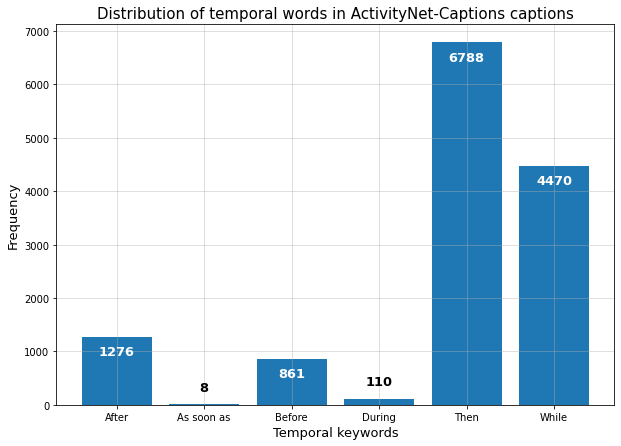

In [40]:
plot_distribution_of_temporal_sentences(
    temporal_sentences, "ActivityNet-Captions", yoffsets={"As soon as": 200, "During": 200},
)

In [43]:
total_temporal_sentences = sum([len(v) for _, v in temporal_sentences.items()])
total_sentences = len(sentences)

In [50]:
total_temporal_sentences, total_sentences

(13513, 54926)

In [44]:
temporal_sentences_fraction = {k: len(v) / total_sentences for k, v in temporal_sentences.items()}

In [45]:
temporal_sentences_fraction

{'after': 0.023231256599788808,
 'before': 0.01567563631067254,
 'then': 0.12358445909041256,
 'while': 0.08138222335505954,
 'during': 0.0020026945344645522,
 'as soon as': 0.000145650511597422}

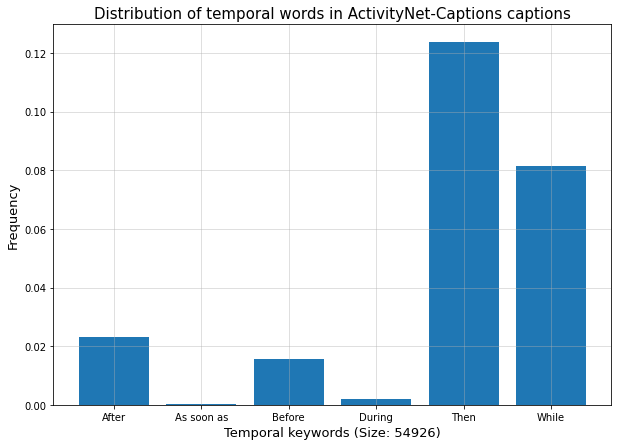

In [49]:
plot_temporal_sentences_fraction(temporal_sentences_fraction, "ActivityNet-Captions", total_sentences)